In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

In [6]:
df = pd.read_csv(r"C:\Users\Rasulbek_Ruzmetov\Desktop\SML_R_Project\Data\Feature_Selection\Feature_Selection.csv")

In [8]:
import xgboost as xgb
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# NaN qiymatlarni to‘ldirish
X = df.drop(columns=["salary"])
y = df["salary"]

# NaN qiymatlari bo‘lgan qatorlarni olib tashlash
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask]

# Raqamli ustunlar uchun median bilan to‘ldirish
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
imputer_num = SimpleImputer(strategy="median")
X[numeric_cols] = imputer_num.fit_transform(X[numeric_cols])

# Kategorik ustunlar uchun eng ko‘p uchraydigan qiymat bilan to‘ldirish
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    imputer_cat = SimpleImputer(strategy="most_frequent")
    X[categorical_cols] = imputer_cat.fit_transform(X[categorical_cols])

# Train-test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBRegressor modelini yaratish va o‘rgatish
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Bashorat qilish
y_pred = model.predict(X_test)

# Metrikalarni hisoblash
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Natijalarni chiqarish
print("📌 XGBRegressor Model Natijalari:")
print(f"MSE: {mse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"R²: {r2:.6f}")


📌 XGBRegressor Model Natijalari:
MSE: 0.136053
MAE: 0.148608
R²: 0.653140


In [9]:
import xgboost as xgb
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# NaN qiymatlarni to‘ldirish
X = df.drop(columns=["salary"])
y = df["salary"]

mask = y.notna()
X = X.loc[mask]
y = y.loc[mask]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
imputer_num = SimpleImputer(strategy="median")
X[numeric_cols] = imputer_num.fit_transform(X[numeric_cols])

categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    imputer_cat = SimpleImputer(strategy="most_frequent")
    X[categorical_cols] = imputer_cat.fit_transform(X[categorical_cols])

# Train-test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = xgb.XGBRegressor(random_state=42)

# Grid Search parametrlari
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Grid Search CV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='r2', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

# Eng yaxshi parametrlar
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Test natijalari
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Natijalarni chiqarish
print("📌 Eng yaxshi parametrlar:", best_params)
print(f"📌 Eng yaxshi Cross-Validation R²: {best_score:.6f}")
print(f"📌 Test MSE: {mse:.6f}")
print(f"📌 Test MAE: {mae:.6f}")
print(f"📌 Test R²: {r2:.6f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
📌 Eng yaxshi parametrlar: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
📌 Eng yaxshi Cross-Validation R²: 0.695905
📌 Test MSE: 0.134095
📌 Test MAE: 0.142109
📌 Test R²: 0.658132


c:\Users\Rasulbek_Ruzmetov\Desktop\SML_R_Project\myvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


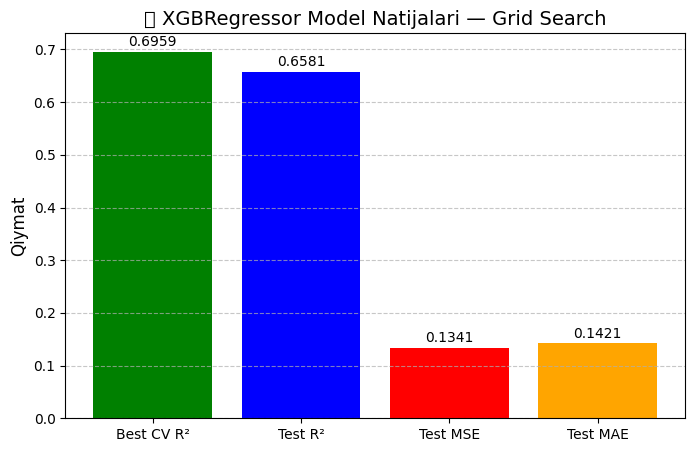

In [11]:
import matplotlib.pyplot as plt

# Natijalar
results = {
    "Metric": ["Best CV R²", "Test R²", "Test MSE", "Test MAE"],
    "Value": [0.695905, 0.658132, 0.134095, 0.142109]
}

# Bar chart yaratish
plt.figure(figsize=(8, 5))
bars = plt.bar(results["Metric"], results["Value"], color=["green", "blue", "red", "orange"])

# Qiymatlarni ustiga chiqarish
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha="center", fontsize=10)

plt.title("📊 XGBRegressor Model Natijalari — Grid Search", fontsize=14)
plt.ylabel("Qiymat", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [12]:
import xgboost as xgb
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# NaN qiymatlarni to‘ldirish
X = df.drop(columns=["salary"])
y = df["salary"]

mask = y.notna()
X = X.loc[mask]
y = y.loc[mask]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
imputer_num = SimpleImputer(strategy="median")
X[numeric_cols] = imputer_num.fit_transform(X[numeric_cols])

categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
    imputer_cat = SimpleImputer(strategy="most_frequent")
    X[categorical_cols] = imputer_cat.fit_transform(X[categorical_cols])

# Train-test bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = xgb.XGBRegressor(random_state=42)

# Randomized Search parametrlari
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5)
}

# Randomized Search CV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=50, scoring='r2', cv=5, n_jobs=-1, verbose=1,
                                   random_state=42)

random_search.fit(X_train, y_train)

# Eng yaxshi parametrlar
best_params = random_search.best_params_
best_score = random_search.best_score_

# Test natijalari
y_pred = random_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Natijalarni chiqarish
print("📌 Eng yaxshi parametrlar:", best_params)
print(f"📌 Eng yaxshi Cross-Validation R²: {best_score:.6f}")
print(f"📌 Test MSE: {mse:.6f}")
print(f"📌 Test MAE: {mae:.6f}")
print(f"📌 Test R²: {r2:.6f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
📌 Eng yaxshi parametrlar: {'subsample': np.float64(1.0), 'n_estimators': 50, 'max_depth': 5, 'learning_rate': np.float64(0.1388888888888889), 'colsample_bytree': np.float64(0.9)}
📌 Eng yaxshi Cross-Validation R²: 0.690063
📌 Test MSE: 0.132022
📌 Test MAE: 0.144220
📌 Test R²: 0.663415


c:\Users\Rasulbek_Ruzmetov\Desktop\SML_R_Project\myvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


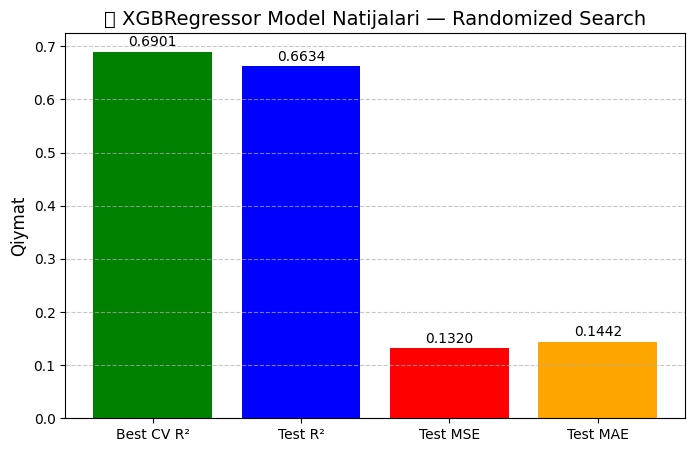

In [13]:
import matplotlib.pyplot as plt

# Randomized Search natijalari
results = {
    "Metric": ["Best CV R²", "Test R²", "Test MSE", "Test MAE"],
    "Value": [random_search.best_score_, r2, mse, mae]  # Randomized Search natijalari
}

# Bar chart yaratish
plt.figure(figsize=(8, 5))
bars = plt.bar(results["Metric"], results["Value"], color=["green", "blue", "red", "orange"])

# Qiymatlarni ustiga chiqarish
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha="center", fontsize=10)

plt.title("📊 XGBRegressor Model Natijalari — Randomized Search", fontsize=14)
plt.ylabel("Qiymat", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


c:\Users\Rasulbek_Ruzmetov\Desktop\SML_R_Project\myvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


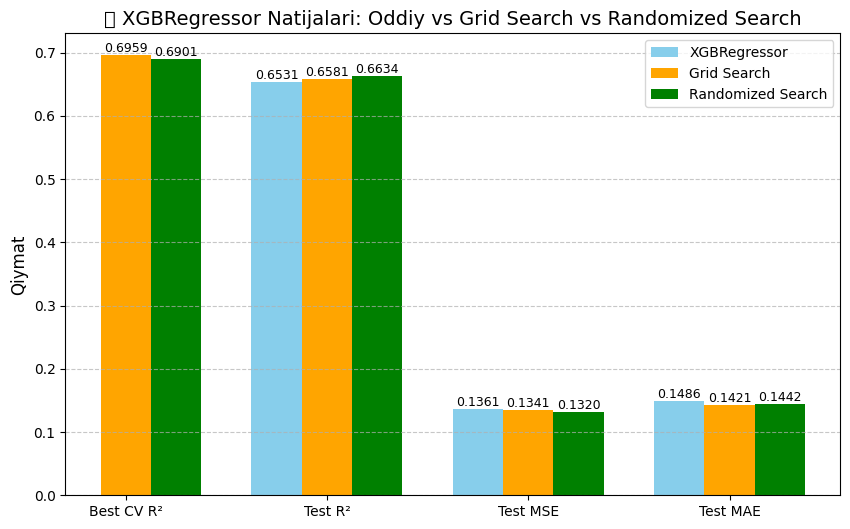


📋 Natijalar jadvali:
               Model  Best CV R²   Test R²  Test MSE  Test MAE
0       XGBRegressor         NaN  0.653140  0.136053  0.148608
1        Grid Search    0.695905  0.658132  0.134095  0.142109
2  Randomized Search    0.690063  0.663415  0.132022  0.144220


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Natijalar
results = {
    "Model": ["XGBRegressor", "Grid Search", "Randomized Search"],
    "Best CV R²": [np.nan, 0.695905, 0.690063],
    "Test R²": [0.653140, 0.658132, 0.663415],
    "Test MSE": [0.136053, 0.134095, 0.132022],
    "Test MAE": [0.148608, 0.142109, 0.144220]
}

df_results = pd.DataFrame(results)

# Bar chart uchun sozlash
metrics = ["Best CV R²", "Test R²", "Test MSE", "Test MAE"]
x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width, df_results.iloc[0, 1:], width, label=df_results["Model"][0], color="skyblue")
bars2 = ax.bar(x, df_results.iloc[1, 1:], width, label=df_results["Model"][1], color="orange")
bars3 = ax.bar(x + width, df_results.iloc[2, 1:], width, label=df_results["Model"][2], color="green")

# Qiymatlarni ustiga yozish
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.4f}", ha="center", fontsize=9)

ax.set_ylabel("Qiymat", fontsize=12)
ax.set_title("📊 XGBRegressor Natijalari: Oddiy vs Grid Search vs Randomized Search", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Jadval ko‘rinishida chiqarish
print("\n📋 Natijalar jadvali:")
print(df_results)


## 📊 Tahlil

### **R² (Model aniqligi)**
- Eng yuqori **Test R²** natijasi — **0.6634** bilan **Randomized Search** modelida kuzatildi.  
- Bu shuni anglatadiki, Randomized Search XGBRegressor modelining taxmin kuchi **~66.34%** ga yetadi.

### **Cross-Validation R²**
- **Grid Search** eng yuqori **Best CV R² = 0.6959** natijasini berdi, bu modelning umumiy barqarorligini ko‘rsatadi.  
- Randomized Search esa **0.6901** bilan juda yaqin natija berdi.

### **Xato metrikalari (MSE & MAE)**
- Eng past **Test MSE = 0.1320** Randomized Search modelida kuzatildi.  
- Eng past **Test MAE = 0.1421** Grid Search modelida qayd etildi.

---

### ✅ Xulosa:
- **Randomized Search** modeli eng yaxshi umumiy natijani berdi:  
  - Eng yuqori **Test R²**  
  - Eng past **Test MSE**  
  - Yuqori **Cross-Validation R²** natijalariga yaqin qiymat  

Shu sababli, **Randomized Search XGBRegressor** modelini tanlash tavsiya qilinadi, chunki u nafaqat yuqori aniqlik, balki past xato bilan barqaror ishlash imkonini beradi.
